<center>
<img src="../../img/ods_stickers.jpg">
## Открытый курс по машинному обучению. Сессия № 2
</center>
Автор материала: программист-исследователь Mail.ru Group, старший преподаватель Факультета Компьютерных Наук ВШЭ Юрий Кашницкий. Материал распространяется на условиях лицензии [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/). Можно использовать в любых целях (редактировать, поправлять и брать за основу), кроме коммерческих, но с обязательным упоминанием автора материала.

# <center>Тема 2. Визуальный анализ данных
## <center>Практическое задание. Визуальный анализ данных по пассажирам "Титаника". Решение

**<a href="https://www.kaggle.com/c/titanic">Соревнование</a> Kaggle "Titanic: Machine Learning from Disaster".**

In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

**Считываем обучающую выборку.**

In [12]:
train_df = pd.read_csv("../../data/titanic_train.csv", 
                       index_col='PassengerId') 

In [13]:
train_df.head(2)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [41]:
train_df.describe(include='all')

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
count,712.000000,712.000000,712,712.000000,712.000000,712.000000,712.000000,712,712.000000,712.000000
unique,NaN,NaN,712,NaN,NaN,NaN,NaN,541,NaN,NaN
top,NaN,NaN,"Olsson, Miss. Elina",NaN,NaN,NaN,NaN,347082,NaN,NaN
freq,NaN,NaN,1,NaN,NaN,NaN,NaN,7,NaN,NaN
mean,0.404494,2.240169,NaN,0.636236,29.642093,0.514045,0.432584,NaN,34.567251,1.261236
std,0.491139,0.836854,NaN,0.481420,14.492933,0.930692,0.854181,NaN,52.938648,0.521561
min,0.000000,1.000000,NaN,0.000000,0.420000,0.000000,0.000000,NaN,0.000000,1.000000
25%,0.000000,1.000000,NaN,0.000000,20.000000,0.000000,0.000000,NaN,8.050000,1.000000
50%,0.000000,2.000000,NaN,1.000000,28.000000,0.000000,0.000000,NaN,15.645850,1.000000
75%,1.000000,3.000000,NaN,1.000000,38.000000,1.000000,1.000000,NaN,33.000000,1.000000


In [14]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


**Выкинем признак `Cabin`, а потом – все строки, где есть пропуски.**

In [15]:
train_df = train_df.drop('Cabin', axis=1).dropna()

**Постройте попарные зависимости признаков `Age`, `Fare`, `Pclass`, `Sex`, `SibSp`, `Parch`, `Embarked` и 
`Survived`. (метод `scatter_matrix ` Pandas или `pairplot` Seaborn).**

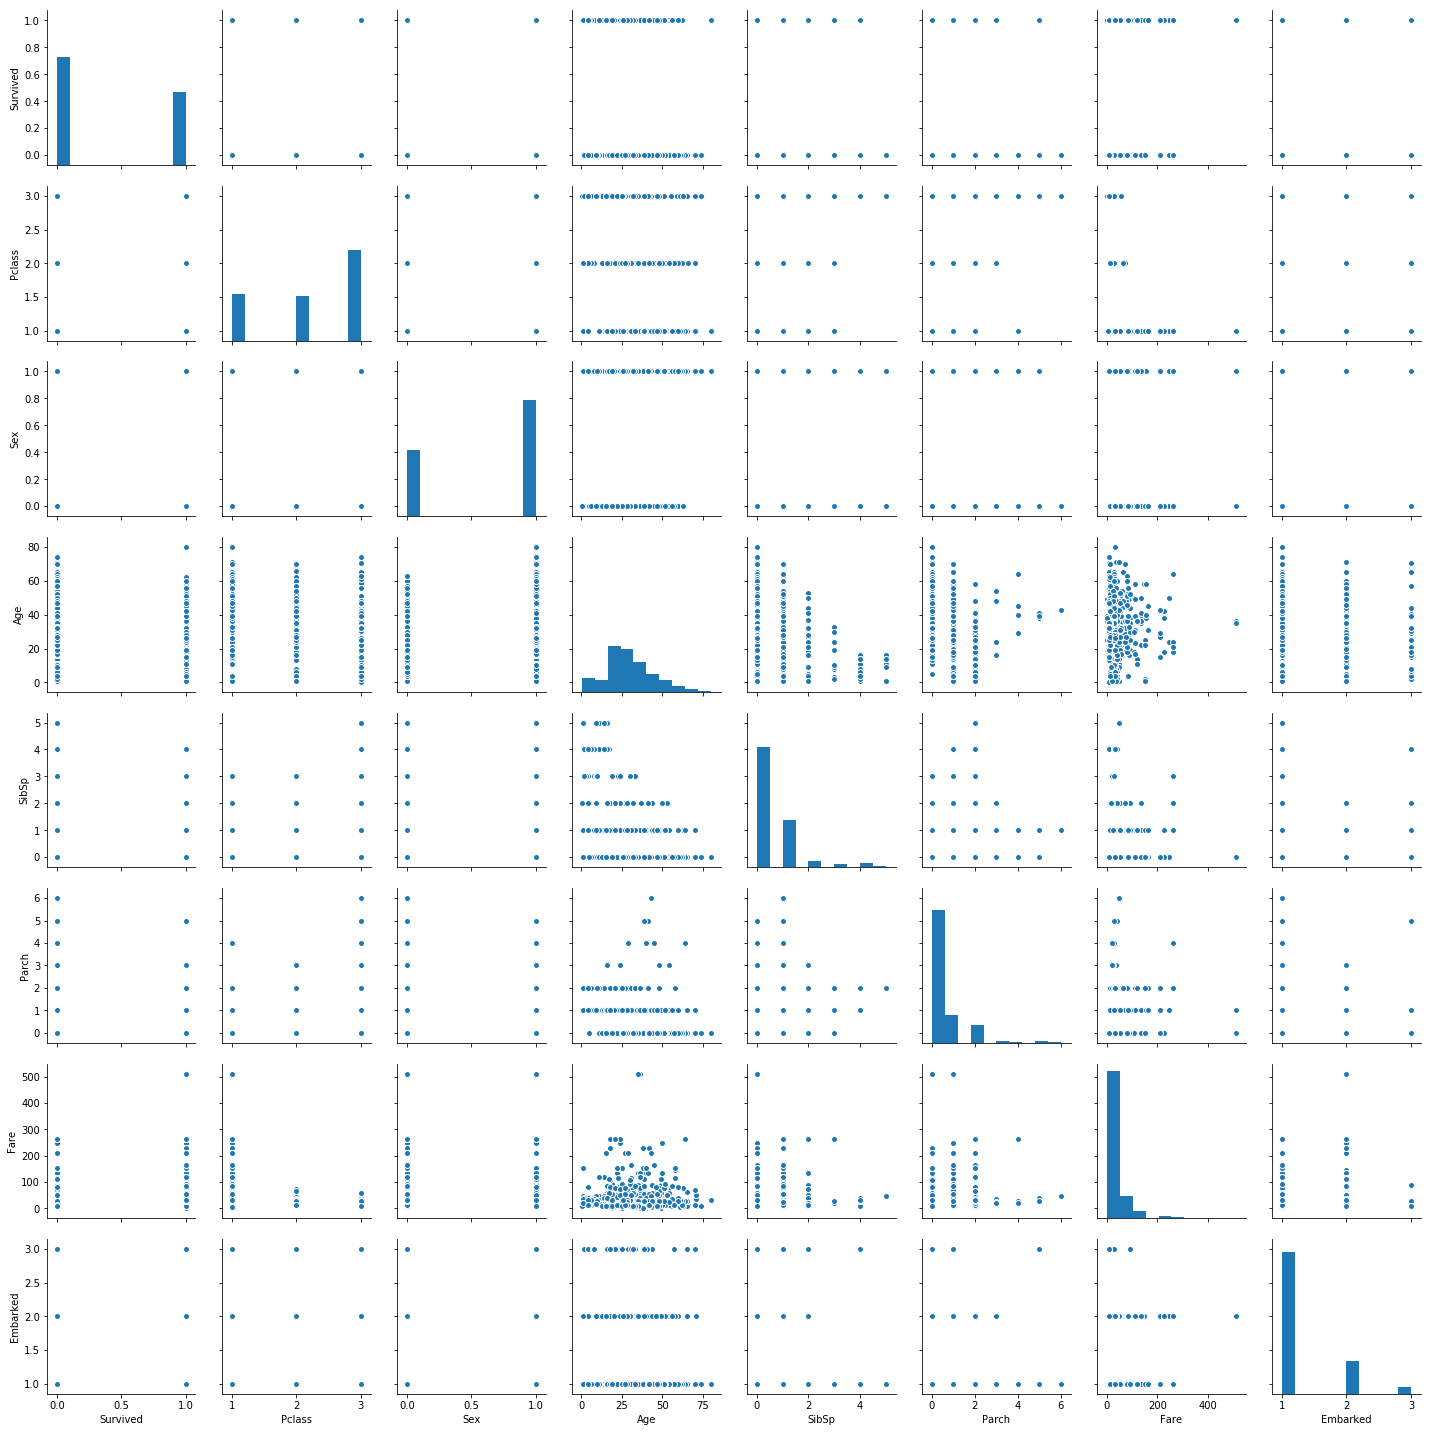

In [16]:
# sns.load_dataset(train_df)
from pandas.plotting import scatter_matrix
train_df.head()
train_df['Sex']=train_df['Sex'].map({'male':1, 'female':0});
train_df['Embarked']=train_df['Embarked'].map({'S':1,'C':2,'Q':3});
sns.pairplot(train_df);


**Как плата за билет (`Fare`) зависит от класса каюты (`Pclass`)? Постройте boxplot.**

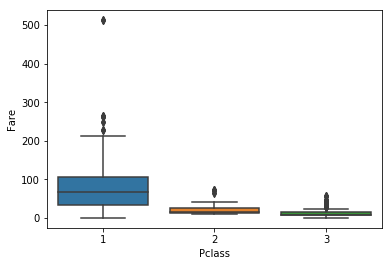

In [71]:
sns.boxplot(x='Pclass',y='Fare', data=train_df)


**Такой boxplot получается не очень красивым из-за выбросов.** 

**Опционально: создайте признак `Fare_no_out` (стоимости без выбросов), в котором исключаются стоимости, отличающиеся от средней по классу более чем на 2 стандартных отклонения. Важно: надо исключать выбросы именно в зависимости от класса каюты. Иначе исключаться будут только самые большие (1 класс) и малые (3 класс) стоимости.**

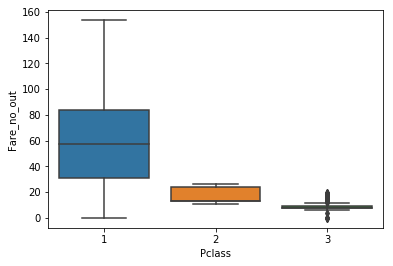

In [108]:
train_df['Fare_no_out'] = train_df['Fare']
fare_pclass1 = train_df[train_df['Pclass'] == 1]['Fare']
fare_pclass2 = train_df[train_df['Pclass'] == 2]['Fare']
fare_pclass3 = train_df[train_df['Pclass'] == 3]['Fare']

fare_pclass1_no_out = fare_pclass1[fare_pclass1<fare_pclass1.std()*2]
fare_pclass2_no_out = fare_pclass2[fare_pclass2<fare_pclass2.std()*2]
fare_pclass3_no_out = fare_pclass3[fare_pclass3<fare_pclass3.std()*2]

train_df['Fare_no_out'] = fare_pclass1_no_out.append(fare_pclass2_no_out)\
                                             .append(fare_pclass3_no_out)
sns.boxplot(x='Pclass',y='Fare_no_out', data=train_df);


**Каково соотношение погибших и выживших в зависимости от пола? Отобразите c помощью Seaborn.countplot c аргументом hue.**

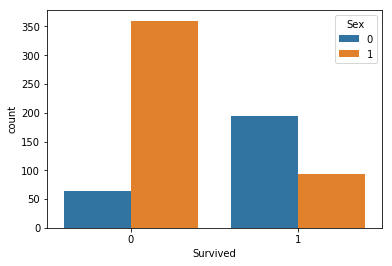

In [114]:
sns.countplot(x='Survived', data=train_df, hue='Sex')

**Каково соотношение погибших и выживших в зависимости от класса каюты? Отобразите c помощью Seaborn.countplot c аргументом hue.**

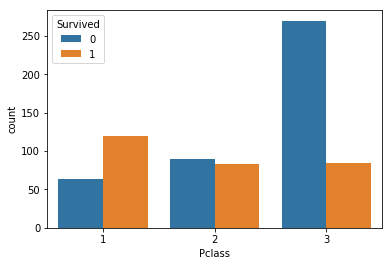

In [117]:
sns.countplot(x='Pclass', data=train_df, hue='Survived')

**Как факт выживания зависит от возраста пассажира? Проверьте (графически) предположение, что молодые чаще выживали. Пусть, условно, молодые - младше 30 лет, пожилые – старше 60 лет.**

In [120]:
def age_category(age):
    '''returns flag 1 if passanger is old'''
    return 1 if age >60 else 0
train_df['Old']=train_df['Age'].apply(age_category)

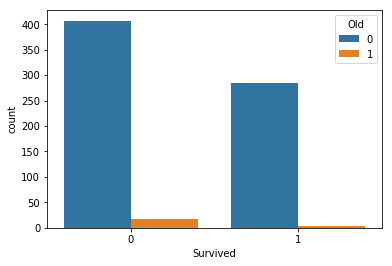

In [128]:
sns.countplot(x='Survived', data=train_df, hue='Old');